In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [10]:
# import base model
model_base = load_model('model_base.h5')
# import VGG model
model_vgg = load_model('model_vgg.h5')
# import cascading model
model_cascade = load_model('model_cascade.h5')



In [16]:
def predictImage(filename):
    img1 = image.load_img(filename)
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model_base.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("NonCovid",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Covid",fontsize=30)


ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 300, 300, 3), found shape=(None, 224, 311, 3)


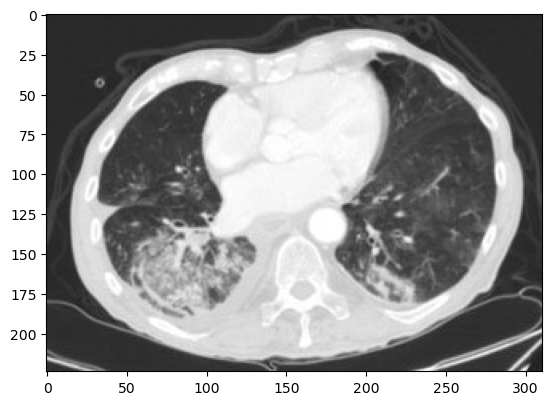

In [17]:
predictImage("COVID-CT-master/Dataset/test/NonCOVID/0.jpg")
predictImage("COVID-CT-master/Dataset/test/COVID/2020.03.12.20034686-p17-91-1.png")
predictImage("COVID-CT-master/Dataset/test/NonCOVID/4%3.jpg")

In [11]:
#Calcing the accuracy of the model
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 80ms/step - loss: 0.6950 - accuracy: 0.5271
Test accuracy: 0.5270935893058777
